In [1]:
import os, sys

sys.path.append(os.getcwd()+"/..")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
os.getcwd()

'c:\\Users\\benja\\OneDrive - ETHZ\\PhD\\Code\\Ensembler'

In [2]:
import src.potentials.OneD as pot
import src.system as system
import src.ensemble.replicas_dynamic_parameters as cvb
import src.integrator as integ


# BUILD Conveyor Belt

In [3]:
numsys = 8
steps = 1000

integrat = integ.metropolisMonteCarloIntegrator()
potial = pot.pertHarmonicOsc(fc=1.0, alpha=10.0, gamma=0.0)
syst = system.perturbedSystem(potential=potial , integrator=integrat)

In [4]:
ens=cvb.ConveyorBelt(0.0, numsys, system=syst, build=False)



BUILD Replicas
Coordinates
	 [coordinates(lam=0.0), coordinates(lam=0.7853981633974483), coordinates(lam=1.5707963267948966), coordinates(lam=2.356194490192345), coordinates(lam=3.141592653589793), coordinates(lam=3.9269908169872414), coordinates(lam=4.71238898038469), coordinates(lam=5.497787143782138)] 

Replicas:
	uniqID	coordinates
	0	coordinates(lam=0.0)
	1	coordinates(lam=0.7853981633974483)
	2	coordinates(lam=1.5707963267948966)
	3	coordinates(lam=2.356194490192345)
	4	coordinates(lam=3.141592653589793)
	5	coordinates(lam=3.9269908169872414)
	6	coordinates(lam=4.71238898038469)
	7	coordinates(lam=5.497787143782138)


In [5]:
ens.run()
ens.accept_move()
ens

{0: <src.system.perturbedSystem object at 0x00000204214AC518>, 1: <src.system.perturbedSystem object at 0x00000204241B2EB8>, 2: <src.system.perturbedSystem object at 0x00000204241E20F0>, 3: <src.system.perturbedSystem object at 0x00000204241E2240>, 4: <src.system.perturbedSystem object at 0x00000204241E2390>, 5: <src.system.perturbedSystem object at 0x00000204241E24E0>, 6: <src.system.perturbedSystem object at 0x00000204241E2630>, 7: <src.system.perturbedSystem object at 0x00000204241E2780>}


0.0      0.21    96.497
1.0      0.46   213.212
2.0      0.71   296.824
3.0      0.96   332.031
4.0      0.79   305.727
5.0      0.54   205.489
6.0      0.29   153.904
7.0      0.04    50.592

In [6]:
#ens.traj_clear()
ens.simulate(steps)
print(ens.reject)


386


In [7]:
(cvb_traj, systrajs) = ens.get_trajs()

In [8]:
systrajs[0].head()

,position,temperature,totEnergy,totPotEnergy,totKinEnergy,dhdpos,velocity,lam,dhdlam
0,[[8.919253235964394]],298.0,39.776539,39.776539,NaN,NaN,[-0.19272021189681032],0.000000,[3977.6539143630653]
1,[[8.919253235964394]],298.0,121.872711,121.872711,NaN,-0.982691,[5.63807870079389],0.206393,[3149.451051415731]
2,[[8.919253235964394]],298.0,121.872711,121.872711,NaN,-0.379345,[-0.3229891647575313],0.206393,[3646.5014205531224]
3,[[8.919253235964394]],298.0,121.872711,121.872711,NaN,-0.067915,[-4.357200248935292],0.206393,[3917.3092692853907]
4,[[8.919253235964394]],298.0,185.932835,185.932835,NaN,-0.059527,[1.9019236963665833],0.367443,[3924.737762035191]


In [9]:
# old: traj=pd.DataFrame(traj, columns=['Step', 'CapLam', 'Energy', 'Bias'])
cvb_traj.head()

,Step,capital_lambda,TotE,biasE,doAccept
0,1,0.648404,1654.275532,1654.275532,True
1,2,0.648404,1691.665656,0.000000,False
2,3,0.648404,1776.942619,0.000000,False
3,4,1.154358,1716.985546,1716.985546,True
4,5,0.728443,1753.133258,1753.133258,True


# Plot Simulation

In [10]:
nbins=100
bins=np.zeros(nbins)
dhdlbins=np.zeros(nbins)
for i in systrajs:
    for j in range(systrajs[i].shape[0]):
        index=int(np.floor(systrajs[i].lam[j]*nbins))
        if index == nbins:
            index=nbins-1
        bins[index]+=1
        dhdlbins[index]+=systrajs[i].dhdlam[j]
dhdlbins/=bins
#dhdlbins

Integral =  3576.9364256836334


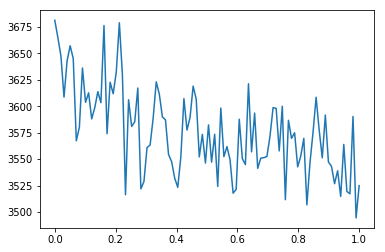

In [11]:
plt.plot(np.linspace(0,1,nbins), dhdlbins)
integral=np.sum(dhdlbins)*1.0/nbins
print('Integral = ', integral)

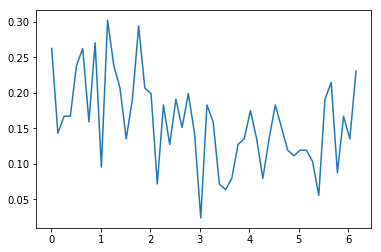

In [12]:
h1=np.histogram(cvb_traj.capital_lambda, bins=50, density=1)
plt.plot(h1[1][:-1], h1[0])
#plt.ylim(0.14, 0.185)

Text(0, 0.5, '$\\lambda$')

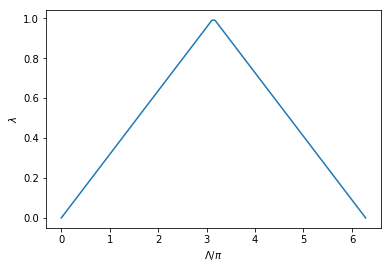

In [13]:
caplam = np.linspace(0, 2*np.pi, 100)
x=[]
for i in caplam:
    x.append(ens.calc_lam(i, 0))
plt.plot(caplam, x)
plt.xlabel('$\Lambda / \pi$')
plt.ylabel('$\lambda$')

In [14]:
#analytical
u=1.66053886e-27
NA=6.0221415e23
hbar=1.054571800e-34*1e12*1e-3*NA  #kJ/mol*ps
R=0.00831446 #kJ/mol/K
mu=0.5  #u
T=300.0  #K
fc1=1  #kJ/nm^2/mol
fc2=11.0 #kJ/nm^2/mol
omega1=np.sqrt(fc1/mu)
omega2=np.sqrt(fc2/mu)
print('Omega', omega1, omega2)
alpha1=hbar*np.sqrt(fc1/mu)/(R*T)
alpha2=hbar*np.sqrt(fc2/mu)/(R*T)
print(alpha1, alpha2)
Z1=np.exp(-alpha1/2.0)/(1-np.exp(-alpha1))
Z2=np.exp(-alpha2/2.0)/(1-np.exp(-alpha2))
F1=-R*T*np.log(Z1)
F2=-R*T*np.log(Z2)
DF=F2-F1
DF2=-R*T*np.log(Z2/Z1)
print(DF, DF2, F1, F2)

Omega 1.4142135623730951 4.69041575982343
0.03600698886161772 0.11942167188449208
2.991927940369414 2.991927940369415 -8.291150088634001 -5.299222148264588


# Conveyor Belt Animation

In [15]:
#import plotEnsembler
import Ensembler.visualisation.plotConveyorBelt as plotEnsembler


lam = np.linspace(0, 1, nbins)
ene = np.cumsum(dhdlbins)/nbins

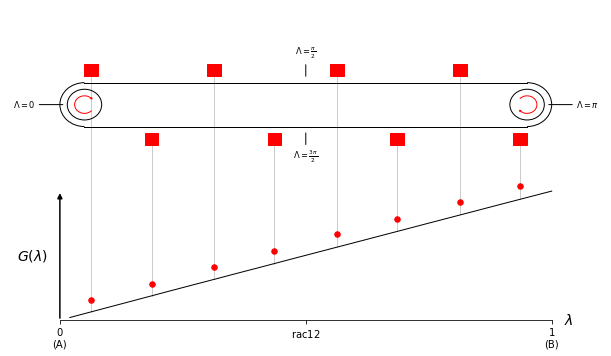

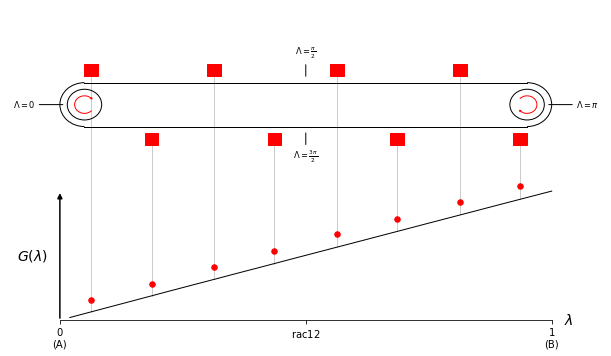

In [16]:
plotEnsembler.drawEnsembler(lam, ene, CapLam=0.2, M=8)

In [17]:
from ipywidgets import interact, interactive, fixed, widgets
import ipywidgets
from matplotlib import pylab
plt.close()

In [0]:
def plotCVB(ens, nbins=100):
    def redraw(CapLam, M):
        plotEnsembler.drawEnsembler(lam, ene, CapLam=CapLam, M=M)

    (cvb_traj, systrajs) = ens.get_trajs()

    if(len(cvb_traj)==0):
        raise IOError("Could not find any conveyor belt simulation in conveyorbelt traj. Please simulate first.")

    bins=np.zeros(nbins)
    dhdlbins=np.zeros(nbins)
    for i in systrajs:
        for j in range(systrajs[i].shape[0]):
            index=int(np.floor(systrajs[i].lam[j]*nbins))
            if index == nbins:
                index=nbins-1
            bins[index]+=1
            dhdlbins[index]+=systrajs[i].dhdlam[j]
    dhdlbins/=bins


    lam = np.linspace(0, 1, nbins)
    ene = np.cumsum(dhdlbins)/nbins
    nReps=ens.nReplicas

    redraw(CapLam=cvb_traj.capital_lambda[0], MnReps)
    plt.show()

    for capLam in cvb_traj.capital_lambda[:10]:
        interact(redraw, CapLam=capLam, M=nReps)


In [0]:
%matplotlib inline
plotCVB(ens, nbins=100)